In [ ]:
import gensim
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from prettytable import PrettyTable

In [ ]:
# Carregar o modelo Word2Vec pré-treinado do Google News
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# Definir palavras-chave
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []

In [ ]:
# Obter vetores de palavras e palavras semelhantes para cada palavra-chave
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
# Aplicar o t-SNE nos vetores de palavras
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = np.array(tsne_model.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
# Plotar o gráfico de dispersão com t-SNE
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

# Imprimir palavras associadas a cada palavra-chave para auxiliar visualização, em uma tabela
def print_word_clusters(labels, word_clusters):
    max_word_length = 30
    for label, words in zip(labels, word_clusters):
        table = PrettyTable()
        table.field_names = [label]
        for word in words:
            truncated_word = word[:max_word_length].strip()
            padded_word = truncated_word.center(max_word_length)
            table.add_row([padded_word])
        table.align[label] = 'c'
        print(table)

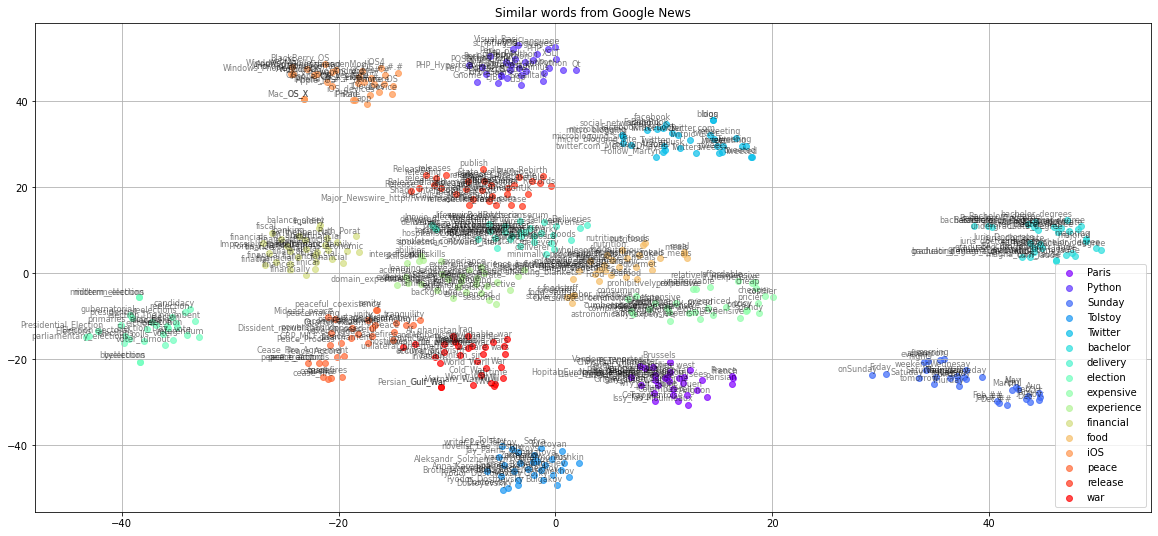

+--------------------------------+
|             Paris              |
+--------------------------------+
|            Parisian            |
| Hopital_Europeen_Georges_Pompi |
|       Spyker_D##_Peking        |
|             France             |
|       Pantheon_Sorbonne        |
|          Aeroports_De          |
|          Grigny_south          |
|    Place_Denfert_Rochereau     |
|      guest_Olivier_Dolige      |
|      Lazard_Freres_Banque      |
|   Pitié_Salpêtrière_Hospital   |
|       Le_Meridien_Etoile       |
|         Nanterre_west          |
|            Colombes            |
|            Créteil             |
|       Christian_Châtelet       |
|             Melun              |
|          Garches_west          |
|             French             |
|            Avignon             |
|         Cergy_Pontoise         |
|           Saint_Ouen           |
|        Vandore_reported        |
|         Ivry_sur_Seine         |
|            Brussels            |
|         Suresnes_w

In [ ]:
tsne_plot_similar_words('Similar words from Google News', keys, embeddings_2d, word_clusters, 0.7, 'similar_words.png')

print_word_clusters(keys, word_clusters)